In [1]:
import sys
sys.path.append('..')
from config_figures import *

### Range size dataframe

In [2]:
df = pd.read_csv(sdms_area_lat_elev_file).drop(['system:index', '.geo'], axis=1)
df

,area,climate,median_elev,median_lat,min_tree_cover,species
0,9.416606e+11,1981_2010,271.175664,3.628973,0,Abarema_barbouriana
1,8.040583e+11,1981_2010,583.798649,-20.127242,0,Abarema_brachystachya
2,5.791520e+11,1981_2010,46.901477,-2.438856,0,Abarema_cochleata
3,3.037458e+11,1981_2010,251.950137,-12.438020,0,Abarema_filamentosa
4,3.035330e+12,1981_2010,199.640084,2.124966,0,Abarema_jupunba
...,...,...,...,...,...,...
42355,3.847464e+12,1981_2010,179.695740,-0.371729,20,Zygia_latifolia
42356,1.156334e+12,1981_2010,263.569186,5.127434,20,Zygia_longifolia
42357,1.920469e+12,1981_2010,135.565639,0.374240,20,Zygia_racemosa
42358,2.422293e+12,1981_2010,112.160143,-1.373868,20,Zygia_unifoliolata


### Biome dataframe

In [3]:
biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}

biome_df = pd.read_csv(sdm_biome_drive_file).drop(['system:index', '.geo'], axis=1)
biome_df = pd.melt(biome_df, id_vars=['species'], var_name = 'biome', value_name = 'sdm_frac')
biome_df = biome_df[(biome_df['sdm_frac'] > 20) & (biome_df['biome'].str.contains('Forests'))]
biome_df['biome_name'] = biome_df['biome'].apply(lambda b: biome_names[b])
biome_df

,species,biome,sdm_frac,biome_name
10,Abies_balsamea,Boreal Forests/Taiga,33,Boreal Forests
33,Abies_sibirica,Boreal Forests/Taiga,54,Boreal Forests
639,Alnus_incana,Boreal Forests/Taiga,25,Boreal Forests
693,Amelanchier_bartramiana,Boreal Forests/Taiga,49,Boreal Forests
1281,Betula_cordifolia,Boreal Forests/Taiga,39,Boreal Forests
...,...,...,...,...
148255,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,78,Tropical Moist Broadleaf Forests
148256,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,82,Tropical Moist Broadleaf Forests
148257,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,96,Tropical Moist Broadleaf Forests
148258,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,79,Tropical Moist Broadleaf Forests


### Construct dataframe with range size and range restriction per species with biome attributed to each species

In [4]:
df_pivot = df[df['climate'] == '1981_2010'].pivot(index='species', columns='min_tree_cover', values='area').reset_index()
df_pivot[10] = 100 - (df_pivot[10] / df_pivot[0] * 100)
df_pivot[20] = 100 - (df_pivot[20] / df_pivot[0] * 100)
df_pivot[0] = np.nan
df_range_restriction = df_pivot.melt(id_vars='species', value_vars=[0,10,20], value_name='range_restriction')

df_range_size_restriction = df[df['climate'] == '1981_2010'][['species', 'min_tree_cover', 'area']].merge(df_range_restriction).merge(biome_df[['species', 'biome_name']], how='outer')
df_range_size_restriction['area'] = df_range_size_restriction['area'] / 1e12
df_range_size_restriction['area_log10'] = np.log10(df_range_size_restriction['area'])
df_range_size_restriction

/Users/nina/opt/anaconda3/envs/ee/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,species,min_tree_cover,area,range_restriction,biome_name,area_log10
0,Abarema_barbouriana,0,0.941661,NaN,Tropical Moist Broadleaf Forests,-0.026106
1,Abarema_barbouriana,10,0.919650,2.337460,Tropical Moist Broadleaf Forests,-0.036378
2,Abarema_barbouriana,20,0.904127,3.985863,Tropical Moist Broadleaf Forests,-0.043770
3,Abarema_brachystachya,0,0.804058,NaN,Tropical Moist Broadleaf Forests,-0.094712
4,Abarema_brachystachya,10,0.583012,27.491394,Tropical Moist Broadleaf Forests,-0.234323
...,...,...,...,...,...,...
36835,Zygia_unifoliolata,10,2.536577,10.633767,Tropical Moist Broadleaf Forests,0.404248
36836,Zygia_unifoliolata,20,2.422293,14.660115,Tropical Moist Broadleaf Forests,0.384227
36837,Zygogynum_pancheri,0,0.010756,NaN,Tropical Moist Broadleaf Forests,-1.968337
36838,Zygogynum_pancheri,10,0.010529,2.110478,Tropical Moist Broadleaf Forests,-1.977601


In [5]:
n_per_biome = df_range_size_restriction.drop_duplicates(['species','biome_name']).groupby('biome_name').species.count()
n_per_biome

biome_name
Boreal Forests                        54
Mediterranean Forests                580
Temperate Broadleaf Forests         1744
Temperate Conifer Forests            178
Tropical Coniferous Forests          588
Tropical Dry Broadleaf Forests      1101
Tropical Moist Broadleaf Forests    6810
Name: species, dtype: int64

0 Tropical Coniferous Forests AxesSubplot(0.125,0.786098;0.352273x0.0939024) AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
1 Tropical Moist Broadleaf Forests AxesSubplot(0.125,0.673415;0.352273x0.0939024) AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
2 Tropical Dry Broadleaf Forests AxesSubplot(0.125,0.560732;0.352273x0.0939024) AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
3 Boreal Forests AxesSubplot(0.125,0.448049;0.352273x0.0939024) AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
4 Temperate Conifer Forests AxesSubplot(0.125,0.335366;0.352273x0.0939024) AxesSubplot(0.547727,0.335366;0.352273x0.0939024)
5 Temperate Broadleaf Forests AxesSubplot(0.125,0.222683;0.352273x0.0939024) AxesSubplot(0.547727,0.222683;0.352273x0.0939024)
6 Mediterranean Forests AxesSubplot(0.125,0.11;0.352273x0.0939024) AxesSubplot(0.547727,0.11;0.352273x0.0939024)


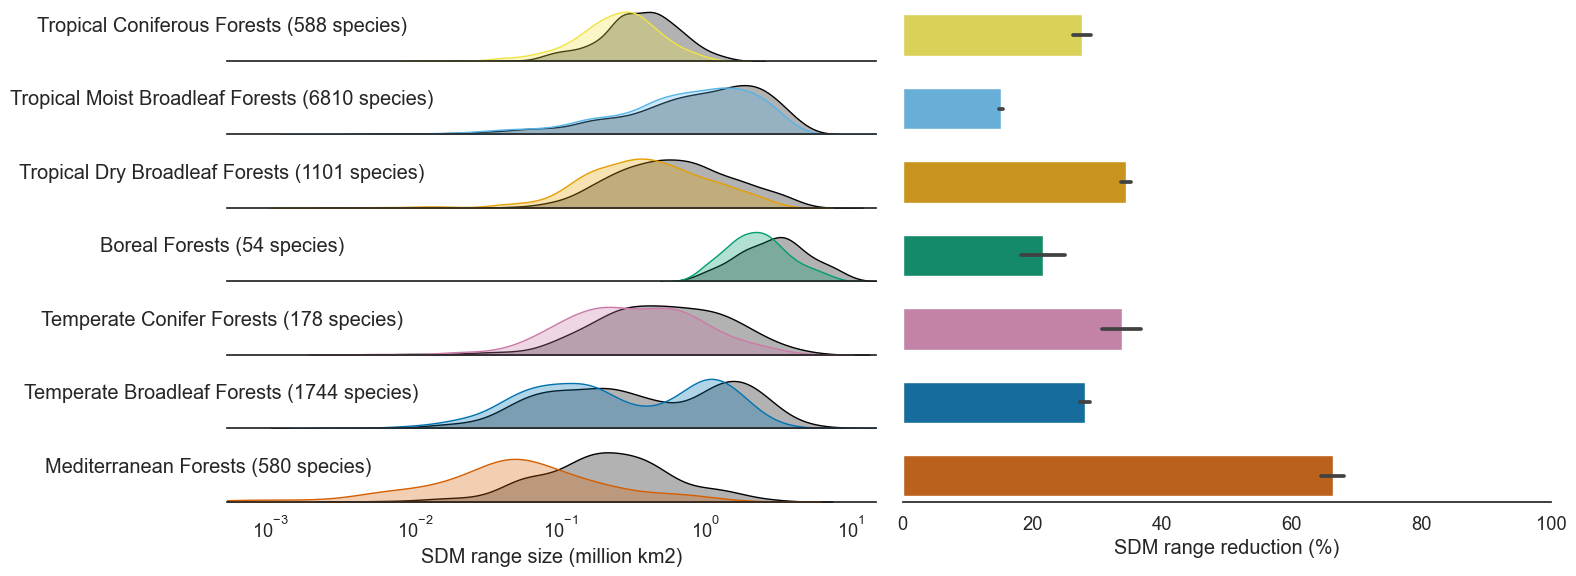

In [12]:
sns.set(style='white', font_scale = 1.2)
fig, axes = plt.subplots(7, 2, figsize=(16, 6))
biome_order = [
    'Tropical Coniferous Forests', 'Tropical Moist Broadleaf Forests', 'Tropical Dry Broadleaf Forests', 
    'Boreal Forests', 'Temperate Conifer Forests', 'Temperate Broadleaf Forests', 'Mediterranean Forests'
]
palette=['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']

for i, ((ax1, ax2), biome, color) in enumerate(zip(axes, biome_order, palette)):
    print(i, biome, ax1, ax2)
    df_biome_0 = df_range_size_restriction[(df_range_size_restriction['biome_name'] == biome) & (df_range_size_restriction['min_tree_cover'] == 0)]
    df_biome_10 = df_range_size_restriction[(df_range_size_restriction['biome_name'] == biome) & (df_range_size_restriction['min_tree_cover'] == 10)]
    sns.kdeplot(ax=ax1, data=df_biome_0[df_biome_0['area'] != 0], x='area', color='black', fill=True, alpha = 0.3, log_scale=True)
    sns.kdeplot(ax=ax1, data=df_biome_10[df_biome_10['area'] != 0], x='area', color=color, fill=True, alpha = 0.3, log_scale=True)
    ax1.set(xlim=(0.0005, 15))
    ax1.set_ylabel(f"{biome} ({str(n_per_biome[biome])} species)", rotation=0)

    sns.barplot(ax=ax2, data=df_biome_10, x='range_restriction', y='biome_name', color=color, errorbar=("ci", 95), estimator='mean')
    ax2.set(ylabel="", yticklabels="", xlim=(0,100))

    if i != 6: 
        for ax in [ax1, ax2]:
            ax.set(xticks=[], yticks=[], xlabel="")
            for side in ['top', 'bottom', 'right', 'left']:
                if ax==ax1 and side=='bottom': continue
                ax.spines[side].set_visible(False)
    else:
        ax1.set(xlabel="SDM range size (million km2)", yticklabels="")
        ax2.set(xlabel="SDM range reduction (%)")
        for ax in [ax1, ax2]:
            for side in ['top', 'right', 'left']:
                ax.spines[side].set_visible(False)

plt.tight_layout()
plt.savefig(figuredir + 'range_restriction_figure.png')

### Statistics on range size restriction per biome 

In [ ]:
df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 10].range_restriction.mean()

In [ ]:
stats = df_range_size_restriction[df_range_size_restriction['min_tree_cover'].isin([0, 10])].groupby(
    ['biome_name', 'min_tree_cover'])[['area','range_restriction']].mean()
stats

In [ ]:
stats = df_range_size_restriction[df_range_size_restriction['min_tree_cover'] == 10].groupby(
    ['biome_name', 'min_tree_cover'])['range_restriction'].agg(['mean','sem'])
stats['C95_low'] = stats['mean'] - 1.96 * stats['sem'] 
stats['C95_high'] = stats['mean'] + 1.96 * stats['sem']
stats

### SDM range size vs. median latitude

In [ ]:
df_area_lat = df[(df['min_tree_cover'] == 10) & (df['climate'] == '1981_2010') & (df['median_lat'] != -999)][['species', 'area', 'median_lat']]
df_area_lat['area'] = df_area_lat['area'] / 1e12
df_area_lat

In [ ]:
from scipy.stats import gaussian_kde

In [ ]:
values = np.vstack([df_area_lat["area"], df_area_lat["median_lat"]])
kernel = gaussian_kde(values)(values)
kernel_norm = (kernel - kernel.min()) / (kernel.max() - kernel.min())

In [ ]:
latitudes = np.arange(-55, 65, 1)
mean_area = [df_area_lat[(df['median_lat'] >= lat-2) & (df['median_lat'] < lat+2)]['area'].mean() for lat in latitudes]

In [ ]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(4,6))
sns.scatterplot(ax=ax, data = df_area_lat, x = 'area', y = 'median_lat', hue = kernel_norm, palette = 'turbo', s = 5, edgecolor = 'none', legend=False)
sns.lineplot(ax=ax, x = mean_area, y = latitudes, orient='y', c='k')
ax.set(ylim=(-40, 70))
ax.set_xlabel('SDM range size (million km2)', fontsize=14)
ax.set_ylabel('SDM median latitude', fontsize = 14)
plt.tight_layout()
plt.savefig(figuredir + 'sdm_range_median_lat.png')